In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import scipy.stats as stats
from sklearn import preprocessing

# Always make it pretty.
plt.style.use('seaborn-pastel')

%matplotlib inline
sns.set_style(style="whitegrid")

In [545]:
#establish groups, below and above median for income
us_median = 59039

#import dataframe
eda_df = pd.read_csv('../ignorefiles/eda_data.csv')

## NP plots

In [714]:
#establish df for plotting num of NPs per State > city > zip
#plot on folium density map
#number of NPs registered with IRS by state


# #dual axis bar plot (reformat values to show in millions)

count = eda_df.groupby('STATE_x').count()[['REVENUE_AMT']]
revs = eda_df.groupby('STATE_x').sum()[['REVENUE_AMT']]

combined = pd.merge(count,revs, left_index=True,right_index=True).sort_values(by='REVENUE_AMT_x', ascending=False)

combined.REVENUE_AMT_y = round(combined['REVENUE_AMT_y']/1000000,2)

def dual_axis_plot(df, y1, y2, title, y1label, y2label, xlabel,filename):
    """function to plot bar and line on dual y-axis."""
    fig, ax1 = plt.subplots(figsize=(12,6))

    ax2 = ax1.twinx()
    
    ax1.bar(df.index, y1,label='Count')
    ax1.set_xticklabels(df.index, rotation=90)
    ax1.set_xlabel(f'{xlabel}', size=12)
    ax1.set_ylabel(f'{y1label}', size=12)
    ax1.set_title(f'{title}', size=15)
    ax1.grid()
    
    ax2.bar(df.index, y2, color='gold', alpha=.3, width=.5, align='center', label='Revenues')
    ax2.set_ylabel(f'{y2label}')
    ax2.grid()
    fig.legend(bbox_to_anchor=(.5, .85))
    plt.savefig(f'../images/{filename}.png')


    

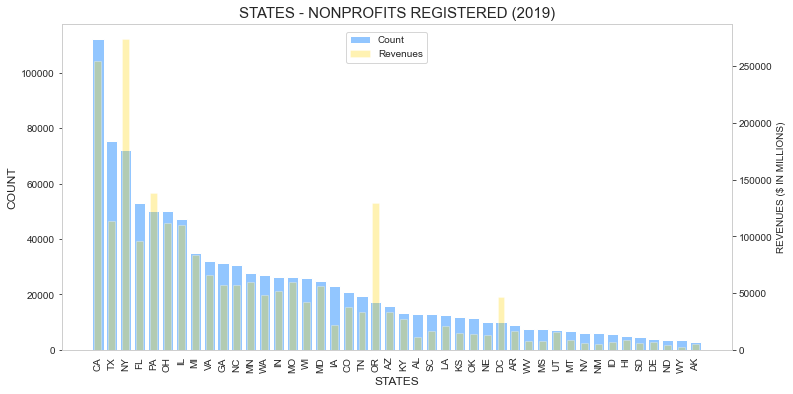

In [715]:
dual_axis_plot(combined, 
               combined['REVENUE_AMT_x'], 
               combined['REVENUE_AMT_y'],
              'STATES - NONPROFITS REGISTERED (2019)',
              'COUNT',
              'REVENUES ($ IN MILLIONS)',
              'STATES',
              'num_nps')

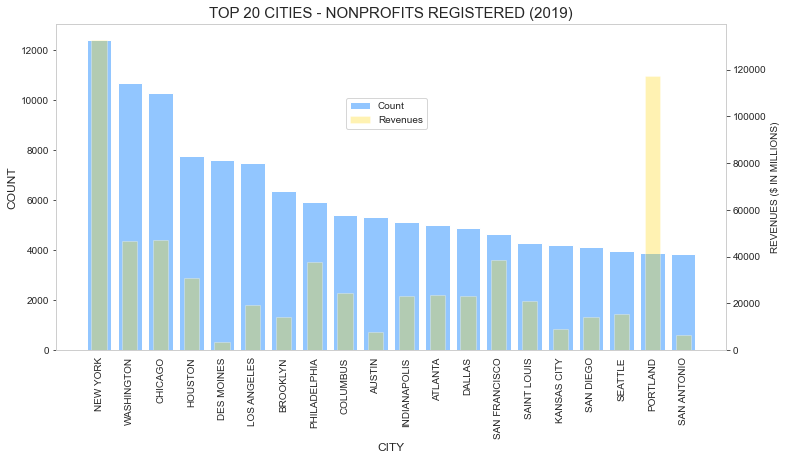

In [716]:
##### establish df for plotting num of NPs per State > city > zip
#plot on folium density map
#number of NPs registered with IRS by city

count2 = eda_df.groupby('CITY').count()[['REVENUE_AMT']]
revs2 = eda_df.groupby('CITY').sum()[['REVENUE_AMT']]

combined2 = pd.merge(count2,revs2, left_index=True,right_index=True).nlargest(20, columns='REVENUE_AMT_x').sort_values(by='REVENUE_AMT_x', ascending=False)

combined2.REVENUE_AMT_y = round(combined2['REVENUE_AMT_y']/1000000,2)


dual_axis_plot(combined2, 
               combined2['REVENUE_AMT_x'], 
               combined2['REVENUE_AMT_y'],
              'TOP 20 CITIES - NONPROFITS REGISTERED (2019)',
              'COUNT',
              'REVENUES ($ IN MILLIONS)',
              'CITY',
              'num_nps_city')

In [223]:

new_index = [ 3,  9,  4, 12,  6,  5, 14,  8,  7, 27, 13,  2, 19, 25, 29, 10,  1,
            17, 11, 18, 23, 26, 15, 91, 16, 82,  0, 50, 20]


index_list = []

for i in new_index:
    index_list.append(f'501(c){i}')


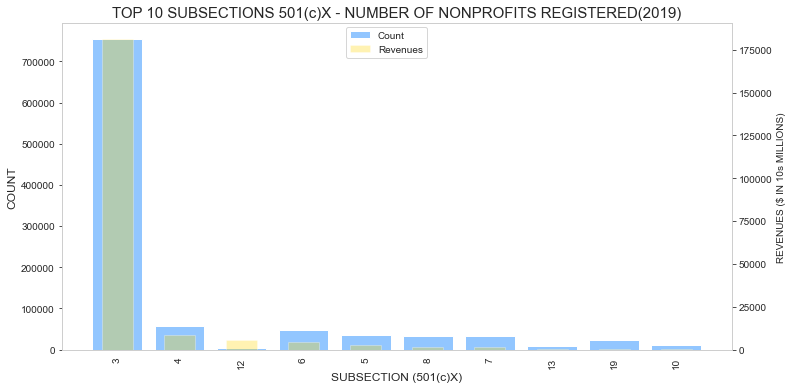

In [717]:
#nps by subsection, relevant because this will tell me 
#type of organization and if contributions are deductible
#deductible is not beind analyzed at this moment

#which subsection have the most NPs and where are they in the US


count3 = eda_df.groupby('SUBSECTION').count()[['REVENUE_AMT']]
revs3 = eda_df.groupby('SUBSECTION').sum()[['REVENUE_AMT']]

combined3 = pd.merge(count3,revs3, left_index=True,right_index=True).nlargest(10,columns='REVENUE_AMT_x').sort_values(by='REVENUE_AMT_y', ascending=False)

combined3.REVENUE_AMT_y = round(combined3['REVENUE_AMT_y']/10000000,2)

# combined3.index.astype('str', copy=False)
combined3.index = combined3.index.astype(str, copy=False)
dual_axis_plot(combined3, 
               combined3['REVENUE_AMT_x'], 
               combined3['REVENUE_AMT_y'],
              'TOP 10 SUBSECTIONS 501(c)X - NUMBER OF NONPROFITS REGISTERED(2019)',
              'COUNT',
              'REVENUES ($ IN 10s MILLIONS)',
              'SUBSECTION (501(c)X)',
              'num_nps_sub')

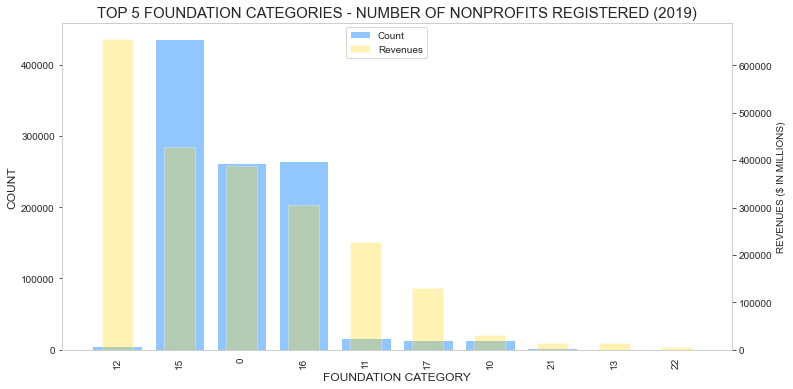

In [718]:
#nps by foundation, where they receive most of their funding

#which foundations have the most NPs and where are they in the US

count4 = eda_df.groupby('FOUNDATION').count()[['REVENUE_AMT']]
revs4 = eda_df.groupby('FOUNDATION').sum()[['REVENUE_AMT']]

combined4 = pd.merge(count4,revs4, left_index=True,right_index=True).nlargest(10,columns='REVENUE_AMT_y').sort_values(by='REVENUE_AMT_y', ascending=False)

combined4.REVENUE_AMT_y = round(combined4['REVENUE_AMT_y']/1000000,2)


combined4.index = combined4.index.astype(str, copy=False)

dual_axis_plot(combined4, 
               combined4['REVENUE_AMT_x'], 
               combined4['REVENUE_AMT_y'],
              'TOP 5 FOUNDATION CATEGORIES - NUMBER OF NONPROFITS REGISTERED (2019)',
              'COUNT',
              'REVENUES ($ IN MILLIONS)',
              'FOUNDATION CATEGORY',
              'num_nps_foun')

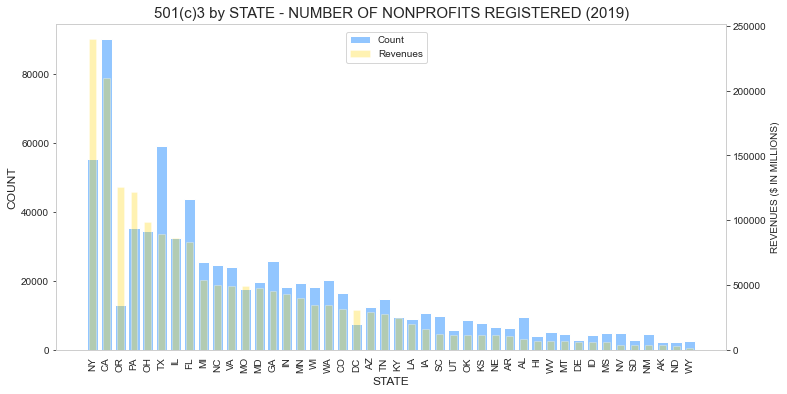

In [719]:
sub501c3 = eda_df[eda_df['SUBSECTION'] == 3]


count5 = sub501c3.groupby('STATE_x').count()[['REVENUE_AMT']]
revs5 = sub501c3.groupby('STATE_x').sum()[['REVENUE_AMT']]

combined5 = pd.merge(count5,revs5, left_index=True,right_index=True).sort_values(by='REVENUE_AMT_y', ascending=False)
#.nlargest(10,columns='REVENUE_AMT_y')
combined5.REVENUE_AMT_y = round(combined5['REVENUE_AMT_y']/1000000,2)


combined5.index = combined5.index.astype(str, copy=False)

dual_axis_plot(combined5, 
               combined5['REVENUE_AMT_x'], 
               combined5['REVENUE_AMT_y'],
              '501(c)3 by STATE - NUMBER OF NONPROFITS REGISTERED (2019)',
              'COUNT',
              'REVENUES ($ IN MILLIONS)',
              'STATE',
              'num_nps_3foun')

In [773]:
subfound = sub501c3[sub501c3['FOUNDATION'] == 15]
df2 = subfound[['STATE_x','FOUNDATION','SUBSECTION','REVENUE_AMT','avg_income','zipcode']]
df3 = df2[df2['REVENUE_AMT'] > 0]
df3

sub501c3

,Unnamed: 0,STATE_x,zipcode,N1,N02650,A02650,avg_income,NAME,CITY,STATE_y,ZIP,SUBSECTION,CLASSIFICATION,FOUNDATION,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD
0,0,AK,99501,7740.0,7740.0,581650.0,75.148579,AFACT-ANCHORAGE FAITH & ACTION- CONGREGATIONS ...,ANCHORAGE,AK,99501-2409,3,7200,15,45396.0,154543.0,154543.0,X012
1,1,AK,99501,7740.0,7740.0,581650.0,75.148579,COVENANT HOUSE ALASKA,ANCHORAGE,AK,99501-3625,3,1000,15,21108722.0,8763496.0,6823299.0,P300
2,2,AK,99501,7740.0,7740.0,581650.0,75.148579,HELPFUL HEARTS,ANCHORAGE,AK,99501-5791,3,1000,15,0.0,0.0,0.0,P11
4,4,AK,99501,7740.0,7740.0,581650.0,75.148579,SOBERMIUT REVIVING OUR SPIRIT INC,ANCHORAGE,AK,99501-5231,3,2000,15,0.0,0.0,0.0,X20
6,6,AK,99501,7740.0,7740.0,581650.0,75.148579,ZENDER ENVIRONMENTAL HEALTH ANDRESEARCH GROUP CO,ANCHORAGE,AK,99501-3702,3,2100,15,460745.0,1022511.0,1022511.0,C02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017125,1017125,WY,83128,950.0,950.0,89831.0,94.558947,ALPINE EMS INC,ALPINE,WY,83128-0030,3,1000,15,375856.0,105082.0,98023.0,E62
1017126,1017126,WY,83128,950.0,950.0,89831.0,94.558947,ALPINE FOOD BANK,ALPINE,WY,83128-3921,3,1000,16,0.0,0.0,0.0,K31
1017128,1017128,WY,83128,950.0,950.0,89831.0,94.558947,NORTHSTAR FOUNDATION,ALPINE,WY,83128-0274,3,1000,15,225000.0,225000.0,225000.0,P99
1017129,1017129,WY,83128,950.0,950.0,89831.0,94.558947,TOP OF THE ROCKIES,ALPINE,WY,83128-0172,3,1000,16,0.0,0.0,0.0,S80


## Income Plots

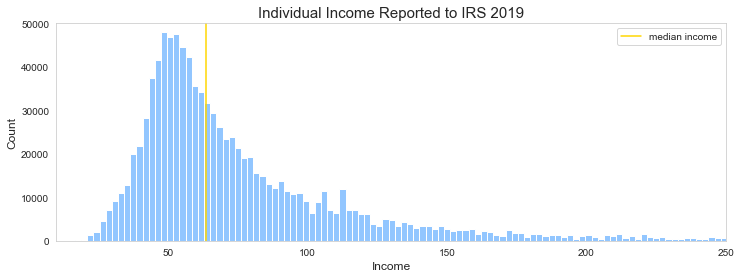

In [763]:
x = eda_df['avg_income']


plt.figure(figsize=(12,4))
plt.xlim(10, 250)
plt.ylim(0,50000)
plt.axvline(x.median(), color='gold', label='median income')
plt.hist(x, bins=1000)
plt.xlabel('Income', size=12)
plt.ylabel('Count', size=12)
plt.title('Individual Income Reported to IRS 2019', size=15)
plt.grid()
plt.legend()
plt.savefig('../images/hist_ind_income.png')

#pareto distribution which is very typical for income 80% pop only has 20% of wealth/income

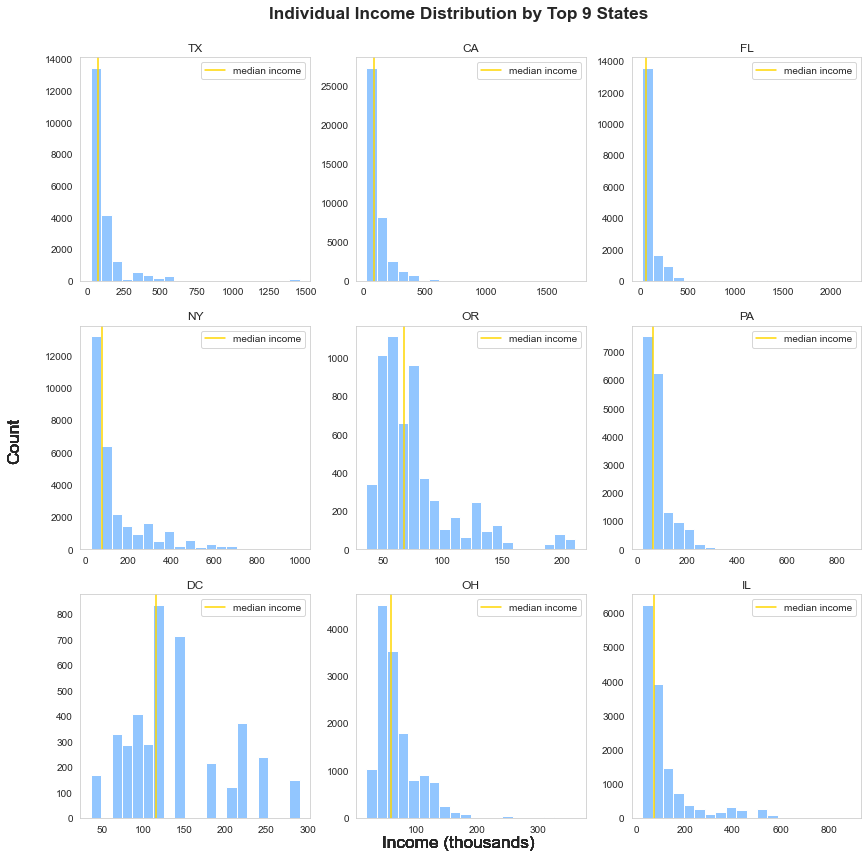

In [750]:
fig, axs = plt.subplots(3,3, figsize=(14,14))

test_state_lst = ['TX','CA','FL', 'NY', 'OR','PA','DC', 'OH','IL']

for i, axs in zip(test_state_lst, axs.flatten()):

    state = df[df['STATE_x']==f'{i}']
    
    x = state['avg_income']
#     y = state['REVENUE_AMT']/1000000
    
    axs.hist(x,bins=20)
    axs.axvline(x.median(), color='gold', label='median income')
    axs.set_title(f'{i}', size=12)
    axs.grid()
    axs.legend()
    fig.tight_layout
    fig.suptitle('Individual Income Distribution by Top 9 States', y=0.93,
                 size='xx-large', weight='bold',
                 stretch='expanded')
    fig.text(0.5, 0.1, 'Income (thousands)', ha='center', va='center',
             size='xx-large', stretch='semi-expanded')
    fig.text(0.06, 0.5, 'Count', ha='center', va='center',
             rotation='vertical', size='xx-large',
             stretch='semi-expanded')
#     plt.savefig('../images/state_inc_hist.png')


    

## NP vs. Income Plots

There we begin to only focus on the nonprofits who have reported income to the IRS, i.e. including only revenues greater than 0. Also, we onyl analyze the Subsection 501(c)3 which are the majority of the nonprofits and revenues. Outliers, such as subsection 12, hospitals and medical research organizations were excluded due to having the amount of revenues they generate vs number of organizations. They would heavily skew our metrics.

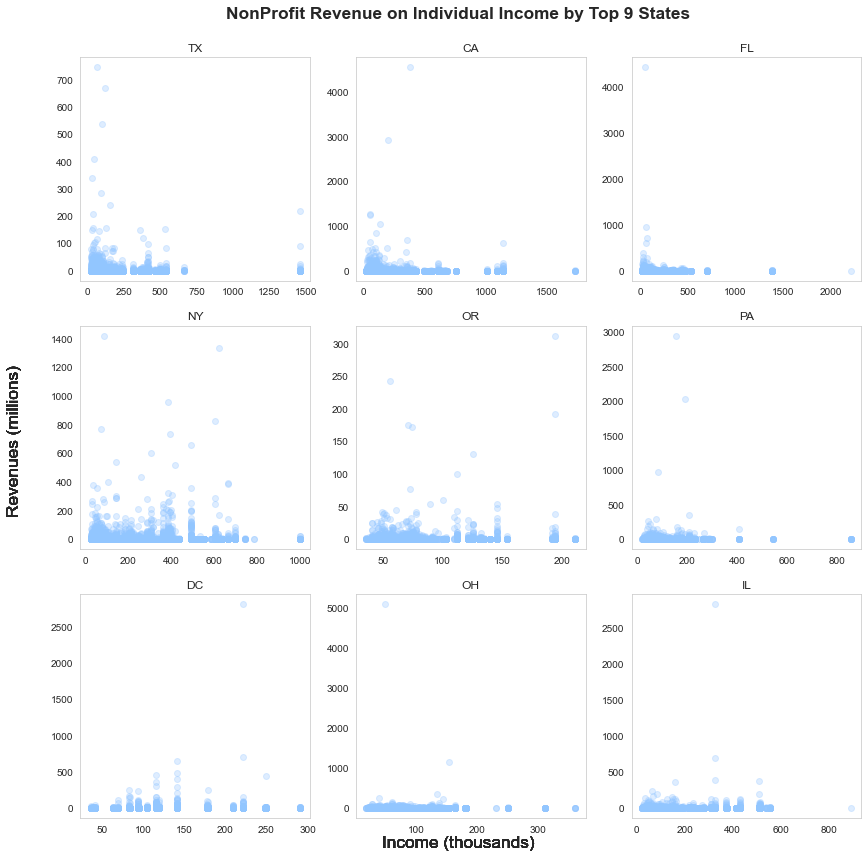

In [765]:

fig, axs = plt.subplots(3,3, figsize=(14,14))

test_state_lst = ['TX','CA','FL', 'NY', 'OR','PA','DC', 'OH','IL']

for i, axs in zip(test_state_lst, axs.flatten()):

    state = df3[df3['STATE_x']==f'{i}']
    
    x = state['avg_income']
    y = state['REVENUE_AMT']/1000000
    
    axs.scatter(x,y, alpha=.3)
    axs.set_title(f'{i}', size=12)
    axs.grid()
    fig.tight_layout
    fig.suptitle('NonProfit Revenue on Individual Income by Top 9 States', y=0.93,
                 size='xx-large', weight='bold',
                 stretch='expanded')
    fig.text(0.5, 0.1, 'Income (thousands)', ha='center', va='center',
             size='xx-large', stretch='semi-expanded')
    fig.text(0.06, 0.5, 'Revenues (millions)', ha='center', va='center',
             rotation='vertical', size='xx-large',
             stretch='semi-expanded')
#     plt.savefig('../images/rev_on_inc_scatter.png')


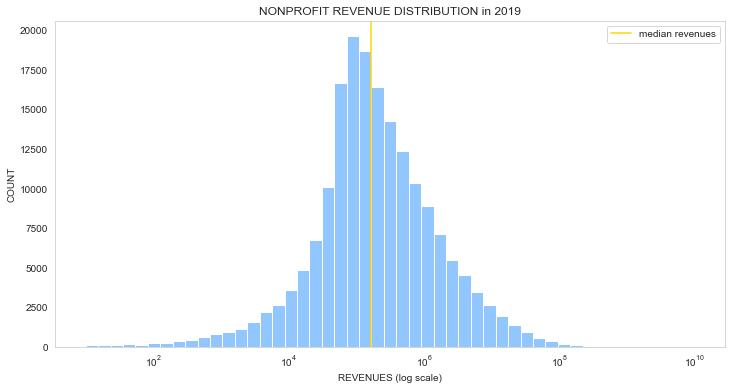

<Figure size 432x288 with 0 Axes>

In [772]:
revs = df3['REVENUE_AMT'].sort_values(ascending=False)


x = np.logspace(1,10)

plt.figure(figsize=(12,6))
plt.hist(revs, bins=x)
plt.axvline(revs.median(), color='gold', label='median revenues')
plt.xscale('log')
plt.title('NONPROFIT REVENUE DISTRIBUTION in 2019')
plt.ylabel('COUNT')
plt.xlabel('REVENUES (log scale)')
plt.legend()
plt.grid()
plt.show()
plt.savefig('../images/np_rev_dist2.png');

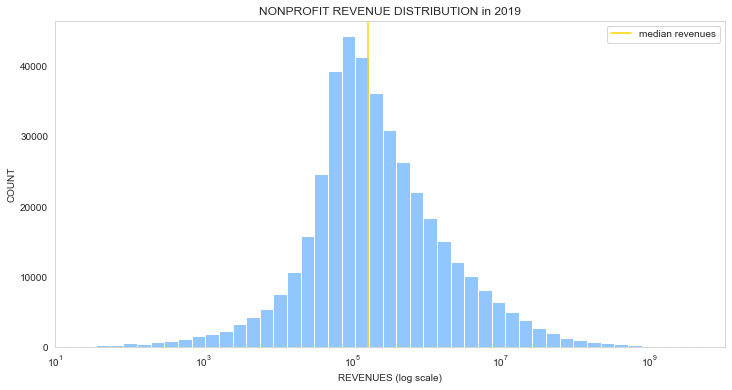

<Figure size 432x288 with 0 Axes>

In [726]:
revs = eda_df[eda_df['REVENUE_AMT'] > 0]['REVENUE_AMT'].sort_values(ascending=False)

# revmed = revs.median

x = np.logspace(1,10)

plt.figure(figsize=(12,6))
plt.hist(revs, bins=x)
plt.axvline(revs.median(), color='gold', label='median revenues')
plt.xlim(10,)
plt.xscale('log')
plt.title('NONPROFIT REVENUE DISTRIBUTION in 2019')
plt.ylabel('COUNT')
plt.xlabel('REVENUES (log scale)')
plt.legend()
plt.grid()
plt.show()
plt.savefig('../images/np_rev_dist.png');

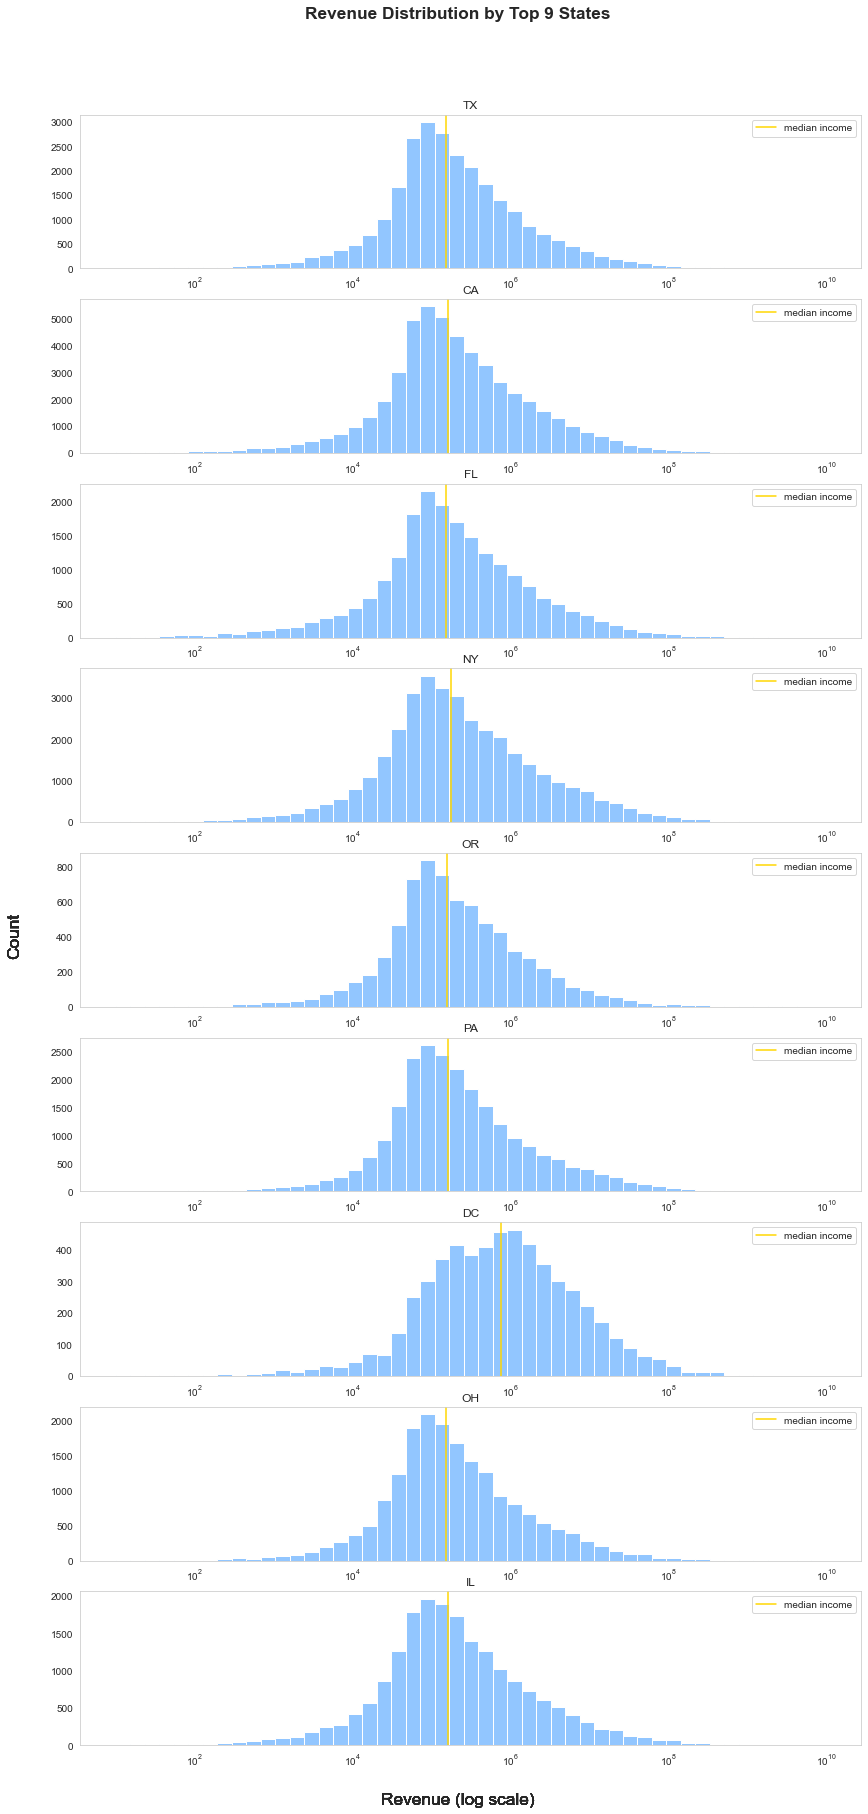

In [523]:
# fig, axs = plt.subplots(9,1, figsize=(14,30))

# test_state_lst = ['TX','CA','FL', 'NY', 'OR','PA','DC', 'OH','IL']

# for i, axs in zip(test_state_lst, axs.flatten()):
    
#     scale = np.logspace(1,10)
    
#     state = df[df['STATE_x']==f'{i}']
    
#     x = state[state['REVENUE_AMT'] > 0]['REVENUE_AMT'].sort_values(ascending=False)
    
#     axs.hist(x,bins=scale)
#     axs.axvline(x.median(), color='gold', label='median income')
#     axs.set_title(f'{i}', size=12)
#     axs.set_xscale('log')
#     axs.grid()
#     axs.legend()
#     fig.tight_layout
#     fig.suptitle('Revenue Distribution by Top 9 States', y=0.93,
#                  size='xx-large', weight='bold',
#                  stretch='expanded')
#     fig.text(0.5, 0.1, 'Revenue (log scale)', ha='center', va='center',
#              size='xx-large', stretch='semi-expanded')
#     fig.text(0.06, 0.5, 'Count', ha='center', va='center',
#              rotation='vertical', size='xx-large',
#              stretch='semi-expanded')
#     plt.savefig('../images/state_rev_hist.png')


In [522]:
x = state[state['REVENUE_AMT'] > 0]['REVENUE_AMT'].sort_values(ascending=False)
sta = state[state['REVENUE_AMT']>0]['REVENUE_AMT'].median()
# x = np.logspace(1,10)

# plt.figure(figsize=(12,6))
# plt.hist(sta, bins=x)
# plt.axvline(sta.median(), color='gold', label='median revenues')
# # plt.xlim(10,)
# plt.xscale('log')
# plt.title('NONPROFIT REVENUE DISTRIBUTION in 2019')
# plt.ylabel('COUNT')
# plt.xlabel('REVENUES (log scale)')
# plt.legend()
# plt.grid()
# plt.show()
# # plt.savefig('../images/np_rev_dist.png')
sta

163029.0

## stats analysis

In [574]:
# eda_df.info()

In [558]:
a = eda_df[eda_df['avg_income'] < eda_df['avg_income'].mean()]['REVENUE_AMT']
b = eda_df[eda_df['avg_income'] >= eda_df['avg_income'].mean()]['REVENUE_AMT']
a2 = a[a>0]
b2 = b[b>0]
# ttest, pvalue = stats.ttest_ind(a,b)

a2
ttest, pvalue = stats.ttest_ind(a2,b)
round(pvalue,4)


0.0001

In [19]:
stat_df = eda_df[['avg_income', 'REVENUE_AMT']]

In [186]:
# clean_teststat_df[stat_df['REVENUE_AMT']>0]

In [546]:
import scipy.stats as stats

#eda_df['avg_income'].mean()

a = eda_df[eda_df['avg_income'] < us_median]['REVENUE_AMT'].values
b = eda_df[eda_df['avg_income'] >= us_median]['REVENUE_AMT'].values

ttest, pvalue = stats.ttest_ind(a,b)

a

array([ 154543., 6823299.,       0., ...,  225000.,       0.,       0.])

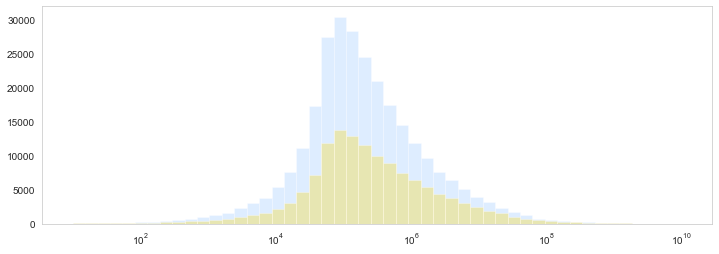

<Figure size 432x288 with 0 Axes>

In [619]:
x = np.logspace(1,10)

plt.figure(figsize=(12,4))
plt.xscale('log')
plt.hist(a2, bins=x, alpha=.3)
plt.hist(b2, bins=x, alpha=.3, color='gold')
plt.grid()
plt.show()
plt.savefig('../images/np_rev_dist.png');

#the probability of observing revenues above the median based on income is nearly 0. 

#the probability of observing revenues above the mean based on income is nearly 0 as well. 
#as the threshold 

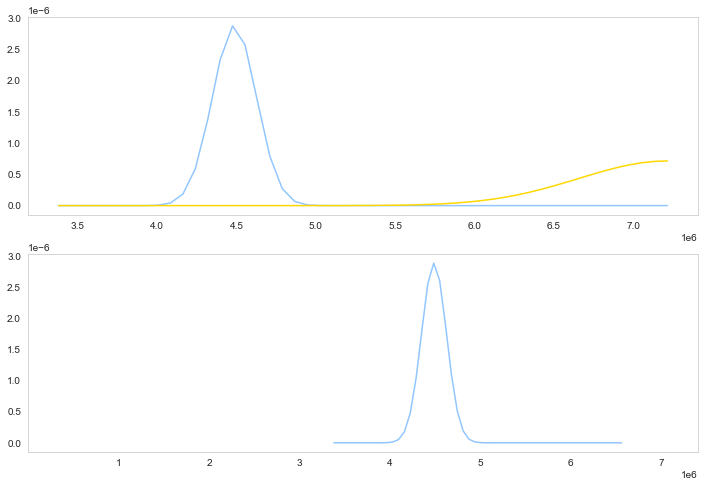

In [668]:
# Plot the distributions of the samples and compare
a = eda_df[eda_df['avg_income'] < eda_df['avg_income'].mean()]['REVENUE_AMT']
b = eda_df[eda_df['avg_income'] >= eda_df['avg_income'].mean()]['REVENUE_AMT']
a2 = a[a>0]
b2 = b[b>0]

min_x = a2.mean() - (a2.std()/(len(a2)**.5)*8)
max_x = a2.mean() + (a2.std()/(len(a2)**.5)*15)

min_y = b2.mean() - (b2.std()/(len(b2)**5)*8)
max_y = b2.mean() + (b2.std()/(len(b2)**5)*)

x = np.linspace(min_x,max_x)
y = np.linspace(min_y,max_y)
z = np.linspace(min(min_x, min_y), max(max_x, max_y))

one = stats.norm(loc=np.mean(a2), scale=np.std(a2)/(len(a2)**.5))
two = stats.norm(loc=np.mean(b2), scale=np.std(b2)/(len(b2)**.5))

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

ax1.plot(z, one.pdf(z))
ax1.plot(z, two.pdf(z), color='gold')


ax2.plot(x, one.pdf(x))
ax2.plot(y, two.pdf(y),color='gold')
ax2.set_xlim(5)
ax1.grid()
ax2.grid()

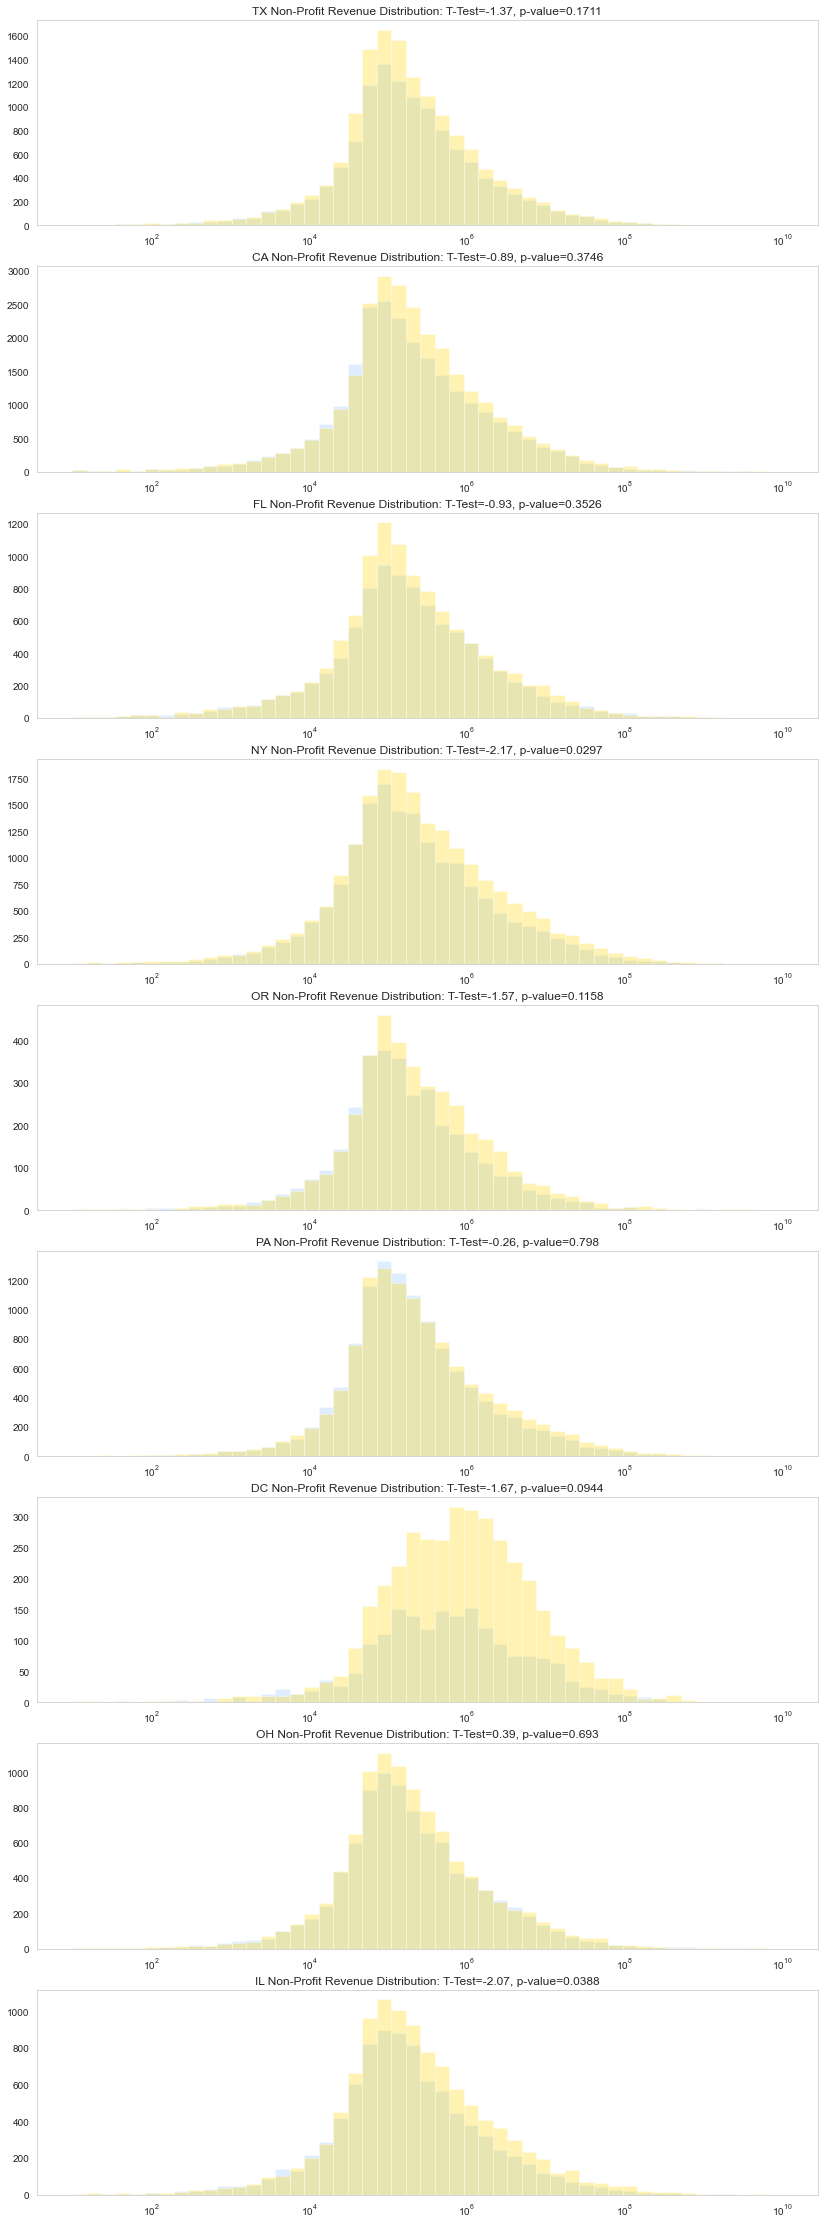

In [626]:
fig, axs = plt.subplots(9,, figsize=(14,40))

test_state_lst = ['TX','CA','FL', 'NY', 'OR','PA','DC', 'OH','IL']

for i, axs in zip(test_state_lst, axs.flatten()):
    
    state = df[df['STATE_x']==f'{i}']

    a = state[state['avg_income'] < state['avg_income'].median()]['REVENUE_AMT']
    b = state[state['avg_income'] >= state['avg_income'].median()]['REVENUE_AMT']
    
    a2 = a[a>0]
    b2 = b[b>0]
    
    ttest, pvalue = stats.ttest_ind(a2,b2)
    
    x = np.logspace(1,10)

    axs.hist(a2, bins=x, alpha=.3)
    axs.hist(b2, bins=x, alpha=.3, color='gold')
    axs.set_title(f'{i} Non-Profit Revenue Distribution: T-Test={round(ttest,2)}, p-value={round(pvalue,4)}')
    axs.set_xscale('log')
    axs.grid()
    
    fig.tight_layout


In [593]:
state = df[df['STATE_x']=='DC']

a = state[state['avg_income'] < state['avg_income'].median()]['REVENUE_AMT']
b = state[state['avg_income'] >= state['avg_income'].median()]['REVENUE_AMT']

a2 = a[a>0]
b2 = b[b>0]

ttest, pvalue = stats.ttest_ind(a2,b2)

ttest, pvalue

(-1.673066163221302, 0.09436945626190285)

In [688]:
test_state_lst = ['TX','CA','FL', 'NY', 'OR','PA','DC', 'OH','IL']

for i in test_state_lst:
    
    state = df[df['STATE_x']==f'{i}']

    a = state[state['avg_income'] < state['avg_income'].median()]['REVENUE_AMT']
    b = state[state['avg_income'] >= state['avg_income'].median()]['REVENUE_AMT']
    
    a2 = a[a>0]
    b2 = b[b>0]
    
    med = state['REVENUE_AMT'].mean()
    stda2 = a2.std()
    meda2 = a2.mean()
    ttest, pvalue = stats.ttest_ind(a2,b2)

In [686]:
subsection = df[df.SUBSECTION == 3]

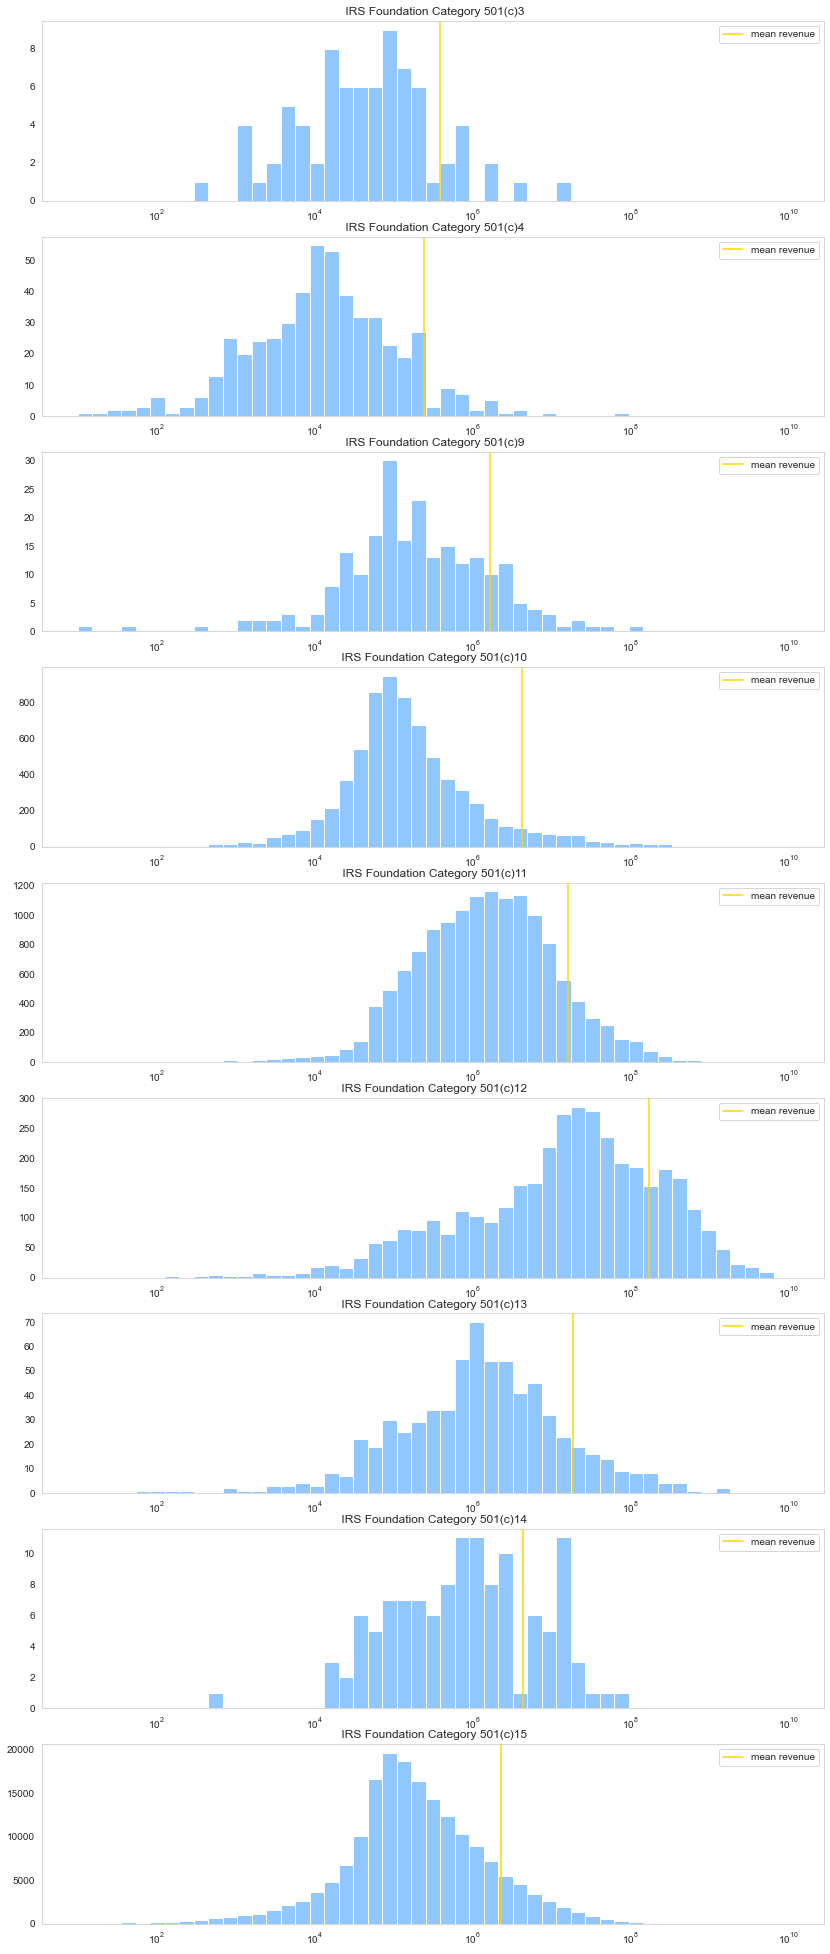

In [687]:
fig, axs = plt.subplots(9,1, figsize=(14,35))

test_sub_lst = [3,4,9,10,11,12,13,14,15,17,18]

for i, axs in zip(test_sub_lst, axs.flatten()):
    
    scale = np.logspace(1,10)
    
    foundation = subsection[subsection['FOUNDATION']==i]
    
    x = foundation[foundation['REVENUE_AMT'] > 0]['REVENUE_AMT'].sort_values(ascending=False)
    
    axs.hist(x,bins=scale)
    axs.axvline(x.mean(), color='gold', label='mean revenue')
    axs.set_title(f' IRS Foundation Category 501(c){i}', size=12)
    axs.set_xscale('log')
    axs.grid()
    axs.legend()
    fig.tight_layout
#     fig.suptitle('Revenue Distribution by Top 9 States', y=0.93,
#                  size='xx-large', weight='bold',
#                  stretch='expanded')
#     fig.text(0.5, 0.1, 'Revenue (log scale)', ha='center', va='center',
#              size='xx-large', stretch='semi-expanded')
#     fig.text(0.06, 0.5, 'Count', ha='center', va='center',
#              rotation='vertical', size='xx-large',
#              stretch='semi-expanded')
#     plt.savefig('../images/state_rev_hist.png')